In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', None)


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer

In [10]:
full_frame = pd.read_csv("/Users/FelixHoffmann/Desktop/GreenLeaders/FullDatasetNumericalUnscaled.csv",index_col=0)

#only keep variables where not all entries are 0 or 1
full_frame_continuous=full_frame_continuous = full_frame.loc[:,~full_frame.isin([0,1]).all()]
full_frame_continuous.reset_index(inplace=True)
full_frame_continuous.drop(columns=('index'),inplace=True)

#scale data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(full_frame_continuous)

#removes mean and scales to unit variance
full_frame_continuous = scaler.transform(full_frame_continuous)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# PCA

In [11]:
#PCA
pca_20 = PCA(n_components =20)
pca_20.fit(full_frame_continuous)
x_pca_20 = pca_20.transform(full_frame_continuous)

In [12]:
#create dataframe for proportion of explained variance
exp_var_ratio_frame= pd.DataFrame(pca_20.explained_variance_ratio_)
exp_var_ratio_frame.index=([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

#create dataframe for absolute explained variance
exp_var_frame= pd.DataFrame(pca_20.explained_variance_)
exp_var_frame.index=([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

#create dataframe for cumulative proportion of explained variance
cumsum_frame=pd.DataFrame(pca_20.explained_variance_ratio_.cumsum())
cumsum_frame.index=([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

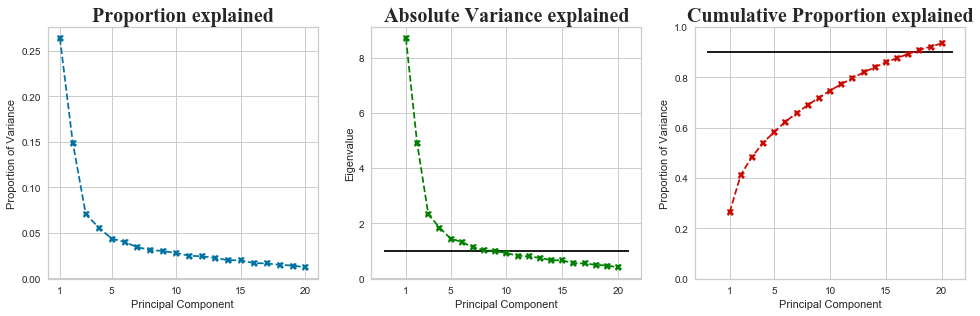

In [13]:
#Decision aids for number of PCs to use in analysis

fig, axes= plt.subplots(1,3,figsize=(14,4.5))

csfont = {'fontname':'Times New Roman'}

#explained variance proportion, rule of thumb: Elbow
axes[0].plot(exp_var_ratio_frame,marker='X',ls='--')
axes[0].set_title('Proportion explained',fontsize=20,**csfont)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Proportion of Variance')
axes[0].set_xticks([1,5,10,15,20])

#absolute explained variance, rule of thumb: >1
axes[1].plot(exp_var_frame,marker='X',ls='--',color='green')
axes[1].hlines(y=1,xmin=-1,xmax=21,color='black')
axes[1].set_title('Absolute Variance explained',fontsize=20,**csfont)
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Eigenvalue')
axes[1].set_xticks([1,5,10,15,20])

#cumulative proportion explained, rule of thumb: >90%
axes[2].set_ylim(0,1)
axes[2].hlines(y=0.9,xmin=-1,xmax=21,color='black')
axes[2].set_title('Cumulative Proportion explained',fontsize=20,**csfont)
axes[2].set_xlabel('Principal Component')
axes[2].set_ylabel('Proportion of Variance')
axes[2].set_xticks([1,5,10,15,20])
_=axes[2].plot(cumsum_frame,marker='X',ls='--',color='r')



fig.tight_layout()

fig.savefig("PCA_explained_variance.png")

In [14]:
columns_list=['Hotel Class', 'Average Rating', 'Price Range (Low)', 'Price Range (High)',
       'Number of Rooms', 'Languages Spoken', 'Total Photos', 'Dining Photos',
       'Pool & Beach Photos', 'Room & Suite Photos', 'Traveler Photos', 'Total Videos',
       'Review Count', 'Excellent Review Count', 'Very Good Review Count',
       'Average Review Count', 'Poor Review Count', 'Terrible Review Count',
       'Q&A Count', 'Room Tip Count', 'Location Rating', 'Cleanliness Rating',
       'Service Rating', 'Value Rating', 'Walker Score', 'Restaurant Score',
       'Attractions Score', 'Description Length', 'Amenities Section Length',
       'Room Feature Section Length', 'Area Comparison', 'English Review Proportion',
       'Local Review Proportion']

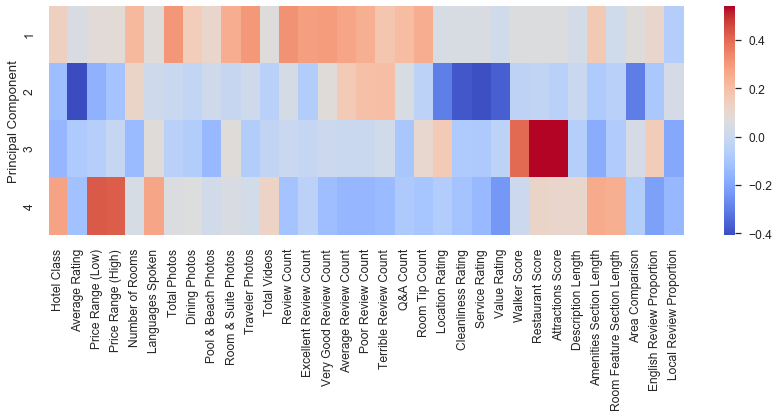

In [15]:
indexed_comp=pd.concat([pd.DataFrame(pca_20.components_[:4],columns=columns_list),pd.DataFrame([1,2,3,4])],axis=1)
indexed_comp.rename(columns={0:'Principal Component'},inplace=True)
comp = indexed_comp.set_index('Principal Component')


fig=plt.figure(figsize=(12,6))

sns.set(font_scale=1.1)
sns_plot=sns.heatmap(comp,cmap='coolwarm',)

bottom, top = sns_plot.get_ylim()
sns_plot.set_ylim(bottom + 0.5, top - 0.5)

fig=sns_plot.get_figure()

plt.tight_layout()

fig.savefig("PCA_factor_loadings_new_Area_comp.png")

# Clustering

<Figure size 576x432 with 0 Axes>

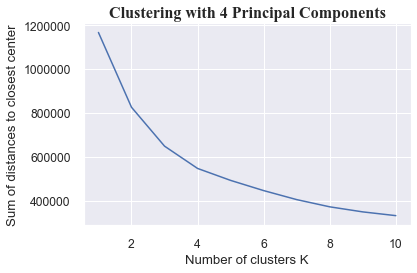

In [18]:
#Clustering using first 4 Principal Components

csfont = {'fontname':'Times New Roman'}

fig=plt.figure(figsize=(8,6))
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x_pca_20[:,:4])
    
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of distances to closest center')
plt.title('Clustering with 4 Principal Components', fontsize=16, **csfont)
plt.tight_layout()

plt.savefig("KMeans_scree_plot_4PCs.png")

<Figure size 576x432 with 0 Axes>

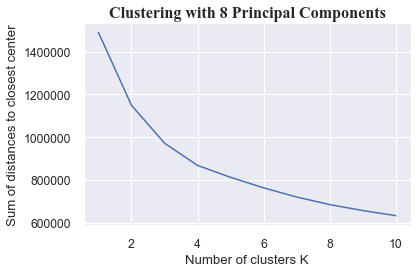

In [19]:
#Clustering using first 8 Principal Components

csfont = {'fontname':'Times New Roman'}

fig=plt.figure(figsize=(8,6))
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x_pca_20[:,:8])
    
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of distances to closest center')
plt.title('Clustering with 8 Principal Components', fontsize=16, **csfont)
plt.tight_layout()

plt.savefig("KMeans_scree_plot_8PCs.png")

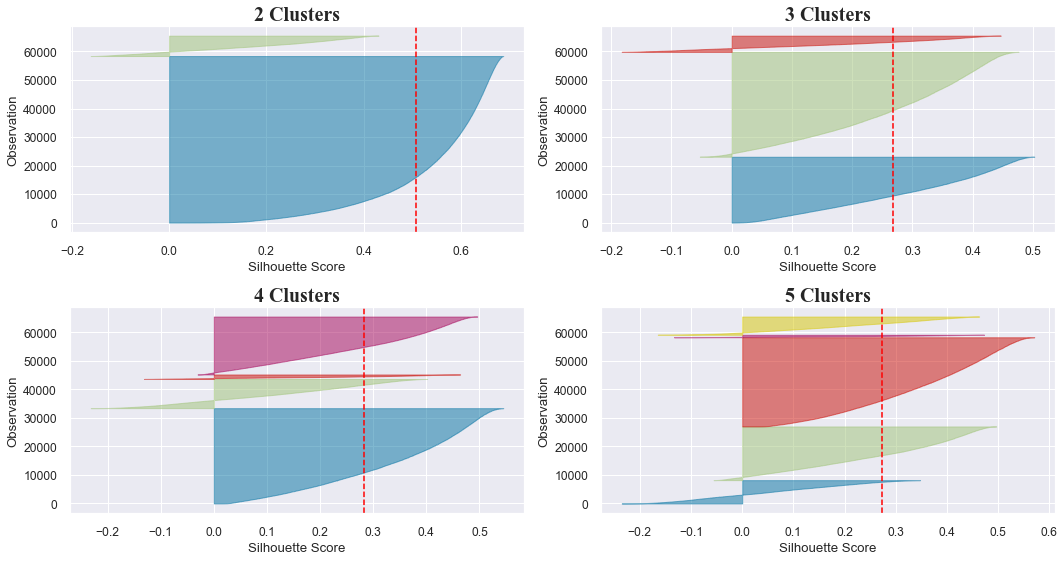

In [26]:
#using 4 PCs

csfont = {'fontname':'Times New Roman'}

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=3, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km,colors='yellowbrick', ax=ax[q-1][mod]) 
    visualizer.fit(x_pca_20[:,:4])
    ax[q-1][mod].set_xlabel('Silhouette Score')
    ax[q-1][mod].set_ylabel('Observation')
    ax[q-1][mod].set_title(f'{i} Clusters', fontsize=20, **csfont)

plt.tight_layout()

fig.savefig("KMeans_silhouette_4PCs.png")
# implementation based on : https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

In [ ]:
#using 8 PCs

csfont = {'fontname':'Times New Roman'}

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=3, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km,colors='yellowbrick', ax=ax[q-1][mod]) 
    visualizer.fit(x_pca_20[:,:8])
    ax[q-1][mod].set_xlabel('Silhouette Score')
    ax[q-1][mod].set_ylabel('Observation')
    ax[q-1][mod].set_title(f'{i} Clusters', fontsize=20, **csfont)

plt.tight_layout()

fig.savefig("KMeans_silhouette_8PCs.png")
# implementation based on : https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

In [ ]:
# Move ahead with 4 Clusters
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100, random_state=42).fit(x_pca_20[:,:4])

#get frame with variables, remove index and binary variables
full_frame_continuous_unscaled = full_frame.loc[:,~full_frame.isin([0,1]).all()]
full_frame_continuous_unscaled.reset_index(inplace=True)
full_frame_continuous_unscaled.drop(columns=('index'),inplace=True)

#create dataframe with cluster labels
cluster_frame=pd.concat([full_frame_continuous_unscaled,pd.DataFrame(kmeans.labels_)],axis=1)
cluster_frame.rename(columns={0:'Cluster'}, inplace=True)

#add (binary) GreenLeader variable for overview
cluster_frame=pd.concat([cluster_frame,full_frame['GreenLeaderBinary'].reset_index()],axis=1)
cluster_frame.drop(columns=('index'),inplace=True)

In [23]:
cluster_frame.groupby('Cluster').count()

,HotelClass,AvgRating,PriceRangeLow,PriceRangeHigh,NumberRooms,LanguagesSpoken,TotalPhotos,DiningPhotos,PoolBeachPhotos,RoomSuitePhotos,...,WalkerScore,RestaurantScore,AttractionsScore,DescriptionLengthWords,AmenitiesSectionLength,RoomFeatSectionLength,Percentile,EnglishReviewProportion,LocalReviewProportion,GreenLeaderBinary
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1376,1376,1376,1376,1376,1376,1376,1376,1376,1376,...,1376,1376,1376,1376,1376,1376,1376,1376,1376,1376
1,33708,33708,33708,33708,33708,33708,33708,33708,33708,33708,...,33708,33708,33708,33708,33708,33708,33708,33708,33708,33708
2,9951,9951,9951,9951,9951,9951,9951,9951,9951,9951,...,9951,9951,9951,9951,9951,9951,9951,9951,9951,9951
3,20480,20480,20480,20480,20480,20480,20480,20480,20480,20480,...,20480,20480,20480,20480,20480,20480,20480,20480,20480,20480


In [24]:
cluster_frame.groupby('Cluster').median()

,HotelClass,AvgRating,PriceRangeLow,PriceRangeHigh,NumberRooms,LanguagesSpoken,TotalPhotos,DiningPhotos,PoolBeachPhotos,RoomSuitePhotos,...,WalkerScore,RestaurantScore,AttractionsScore,DescriptionLengthWords,AmenitiesSectionLength,RoomFeatSectionLength,Percentile,EnglishReviewProportion,LocalReviewProportion,GreenLeaderBinary
Cluster,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,85.0,202.0,262.5,4.0,1654.0,0.0,0.0,338.0,...,89.0,67.5,15.0,127.5,508.5,106.0,0.691742,0.705492,0.228025,0.0
1,3.0,4.5,70.0,124.0,19.0,2.0,81.0,3.0,0.0,17.0,...,80.0,41.0,10.0,115.0,207.0,97.0,0.750000,0.327485,0.619048,0.0
2,4.0,4.0,81.0,184.0,84.0,3.0,597.0,0.0,0.0,157.0,...,96.0,92.0,23.0,122.0,379.0,104.0,0.755556,0.567080,0.313078,0.0
3,3.0,3.5,55.0,102.0,34.0,2.0,60.0,2.0,0.0,13.0,...,77.0,44.0,9.0,127.0,160.0,85.0,0.375000,0.212766,0.652174,0.0


In [25]:
cluster_frame.groupby('Cluster').mean()

,HotelClass,AvgRating,PriceRangeLow,PriceRangeHigh,NumberRooms,LanguagesSpoken,TotalPhotos,DiningPhotos,PoolBeachPhotos,RoomSuitePhotos,...,WalkerScore,RestaurantScore,AttractionsScore,DescriptionLengthWords,AmenitiesSectionLength,RoomFeatSectionLength,Percentile,EnglishReviewProportion,LocalReviewProportion,GreenLeaderBinary
Cluster,,,,,,,,,,,,,,,,,,,,,
0,3.934593,4.050872,96.683866,244.604651,294.071221,3.920058,1845.510174,57.417151,64.979651,364.236192,...,81.638808,119.777616,37.640262,132.682413,529.348837,140.402616,0.646464,0.685061,0.394639,0.197674
1,3.088406,4.388335,78.507624,156.991100,31.622197,2.544025,118.723330,8.051234,2.319627,30.606414,...,76.169426,77.156817,23.386763,113.670553,228.787261,124.724101,0.704661,0.411120,0.572238,0.020737
2,3.726158,4.210029,102.622350,251.120088,108.142096,3.735202,664.468697,25.439152,12.663853,174.540850,...,85.928650,160.113657,51.889760,127.989850,407.961411,137.385991,0.717205,0.569274,0.416206,0.102804
3,2.766016,3.443457,59.421875,124.505078,51.804150,2.786523,95.328955,5.607129,2.085693,25.457520,...,74.563623,80.392822,20.577295,115.116406,182.198828,116.158154,0.381440,0.290516,0.594359,0.018799
